In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("bank_data.csv")

In [3]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


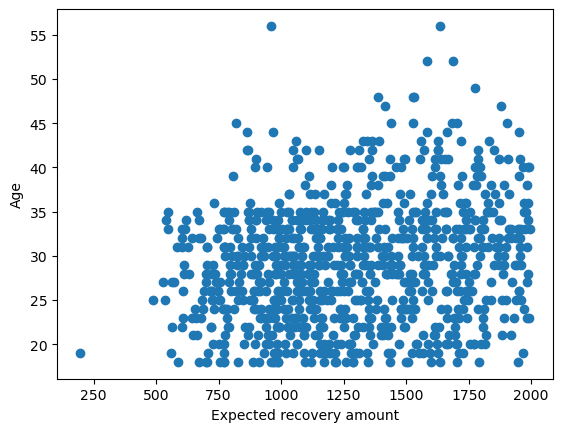

In [5]:
df_filtered = df[(df['expected_recovery_amount']>= 0) & (df['expected_recovery_amount']<=2000)]
plt.scatter(df_filtered['expected_recovery_amount'],df_filtered['age'])
plt.xlabel('Expected recovery amount')
plt.ylabel('Age')
plt.show()

no discontinuinity

In [7]:
df_filtered = df[(df['expected_recovery_amount'] >=900)&(df['expected_recovery_amount']<=1100)]
male_count =df[df['sex']=='Male'].shape[0]
total_rows = df.shape[0]
percentage_of_males = (male_count / total_rows) * 100
print("percentage_of_males: " , percentage_of_males , "%")

percentage_of_males:  51.70031880977683 %


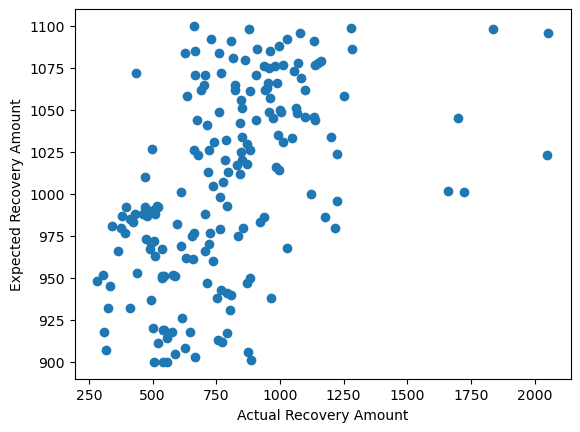

In [9]:
df_filtered = df[(df['expected_recovery_amount'] >=900)&(df['expected_recovery_amount']<=1100)]
plt.scatter(df_filtered['actual_recovery_amount'],df_filtered['expected_recovery_amount'])
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')
plt.show()

In [11]:
from scipy.stats import kruskal
df_filtered = df[(df['expected_recovery_amount'] >=900)&(df['expected_recovery_amount']<=1100)]
grouped_data = df_filtered.groupby('actual_recovery_amount')['expected_recovery_amount'].apply(list)
statistic, p_value = kruskal(*grouped_data)
print("Kruskal-Wallis test statistic: ",statistic)
print("p_value: ", p_value)

Kruskal-Wallis test statistic:  183.0
p_value:  0.48609714517719294


In [12]:
from scipy.stats import kruskal
df_filtered = df[(df['expected_recovery_amount'] >=950)&(df['expected_recovery_amount']<=1050)]
grouped_data = df_filtered.groupby('actual_recovery_amount')['expected_recovery_amount'].apply(list)
statistic, p_value = kruskal(*grouped_data)
print("Kruskal-Wallis test statistic: ",statistic)
print("p_value: ", p_value)

Kruskal-Wallis test statistic:  99.0
p_value:  0.4810969124082639


In [22]:
import statsmodels.api as sm
df_filtered = df[(df['expected_recovery_amount'] >=900)&(df['expected_recovery_amount']<=1100)]
X = df_filtered [['expected_recovery_amount']]
y = df_filtered ['actual_recovery_amount']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Sun, 23 Jul 2023   Prob (F-statistic):           3.65e-13
Time:                            01:48:20   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1918.4549    346.395     -5.538      0.000   -2601.920   -1234.989
expected_recovery_amount     2.6956      0.344      7.841      0.000       2.017       3.374
==============================================================================
Omnibus:                       64.512   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.639
Skew:                           1.457   Prob(JB):                     4.89e-41
Kurtosis:                       6.965   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
import statsmodels.api as sm
df['threshold']= np.where(df['expected_recovery_amount']<1000,0,1)
df_filtered = df[(df['expected_recovery_amount'] >=900)&(df['expected_recovery_amount']<=1100)]
X = df_filtered [['expected_recovery_amount','threshold']]
y = df_filtered ['actual_recovery_amount']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.309
Model:                                OLS   Adj. R-squared:                  0.301
Method:                     Least Squares   F-statistic:                     40.43
Date:                    Sun, 23 Jul 2023   Prob (F-statistic):           3.06e-15
Time:                            01:51:44   Log-Likelihood:                -1279.3
No. Observations:                     184   AIC:                             2565.
Df Residuals:                         181   BIC:                             2574.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       98.8272    622.659      0.159      0.874   -1129.777    1327.431
expected_recovery_amount     0.5430      0.651      0.834      0.406      -0.742       1.828
threshold                  284.0296     73.988      3.839      0.000     138.041     430.019
==============================================================================
Omnibus:                       66.386   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.158
Skew:                           1.512   Prob(JB):                     1.39e-41
Kurtosis:                       6.924   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
import statsmodels.api as sm
df_filtered = df[(df['expected_recovery_amount'] >=950)&(df['expected_recovery_amount']<=1050)]
X = df_filtered [['expected_recovery_amount']]
y = df_filtered ['actual_recovery_amount']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.238
Model:                                OLS   Adj. R-squared:                  0.230
Method:                     Least Squares   F-statistic:                     30.64
Date:                    Sun, 23 Jul 2023   Prob (F-statistic):           2.60e-07
Time:                            01:53:39   Log-Likelihood:                -702.76
No. Observations:                     100   AIC:                             1410.
Df Residuals:                          98   BIC:                             1415.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4365.0780    928.299     -4.702      0.000   -6207.257   -2522.899
expected_recovery_amount     5.1385      0.928      5.535      0.000       3.296       6.981
==============================================================================
Omnibus:                       45.225   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.157
Skew:                           1.694   Prob(JB):                     2.68e-25
Kurtosis:                       6.960   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""